<a href="https://colab.research.google.com/github/yzhu233/MAT421/blob/main/ModuleG_Yaci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21.1 Numerical Integration Problem Statement

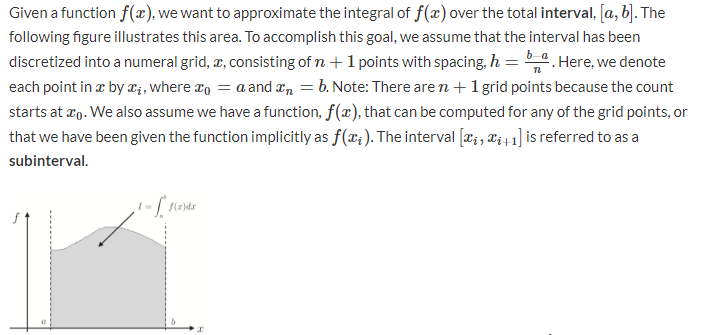

21.2 Riemann's Integral 

Riemann Integral -- The simplest method for approximating integrals is by summing the area of rectangles that are defined for each subinterval.

Midpoint Rule -- takes the rectangle height of the rectangle at each subinterval to be the function value at the midpoint between $x_i$
 and $x_(i+1)$
, which for compactness we denote by $y_i=(x_(i+1)+x_i)/2$. 

In [ ]:
def left_riemann_sum(f, a, b, n):
    dx = (b - a) / n
    x = a
    sum = 0
    for i in range(n):
        sum += f(x) * dx
        x += dx
    return sum

def right_riemann_sum(f, a, b, n):
    dx = (b - a) / n
    x = a + dx
    sum = 0
    for i in range(n):
        sum += f(x) * dx
        x += dx
    return sum

def midpoint_rule(f, a, b, n):
    dx = (b - a) / n
    x = a + dx/2
    sum = 0
    for i in range(n):
        sum += f(x) * dx
        x += dx
    return sum


def f(x):
    return x ** 2

a = 0
b = 1
n = 100

left_sum = left_riemann_sum(f, a, b, n)
right_sum = right_riemann_sum(f, a, b, n)
midpoint_sum = midpoint_rule(f, a, b, n)

print("Left Riemann sum:", left_sum)
print("Right Riemann sum:", right_sum)
print("Midpoint rule sum:", midpoint_sum)

Left Riemann sum: 0.32835000000000036
Right Riemann sum: 0.3383500000000004
Midpoint rule sum: 0.3333250000000004


21.3 Trapezoid Rule

The Trapezoid Rule fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral. 

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(I_trap)
print(err_trap)

1.9835235375094546
0.01647646249054535


21.4 Simpson's Rule

Simpson’s Rule approximates the area under f(x) over these two subintervals by fitting a quadratic polynomial through the points $(x_{i−1},f(x_{i−1}))$,$(x_i,f(x_i))$, and $(x_{i+1},f(x_{i+1}))$, which is a unique polynomial, and then integrating the quadratic exactly.

In [ ]:
def simpsons_rule(f, a, b, n=1000):
    h = (b - a) / n
    x = [a + i * h for i in range(n+1)]
    y = [f(xi) for xi in x]
    integral = h/3 * (y[0] + y[-1] + 4*sum(y[1:-1:2]) + 2*sum(y[2:-1:2]))
    return integral

def f(x):
    return x**3

integral = simpsons_rule(f, 0, 1)
print(integral)


0.25


21.5 Computing Integrals in Python 

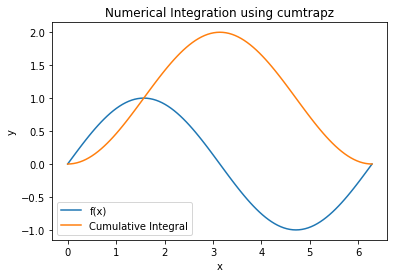

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

def f(x):
    return np.sin(x)

a, b = 0, 2*np.pi
x = np.linspace(a, b, 101)
y = f(x)
cumulative_integral = cumtrapz(y, x, initial=0)

fig, ax = plt.subplots()
ax.plot(x, y, label='f(x)')
ax.plot(x, cumulative_integral, label='Cumulative Integral')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Numerical Integration using cumtrapz')
plt.show()